In [2]:
from BigDFT import Fragments as ef

In [3]:
#extract the fragment of three PC
three=ef.System(xyz='testfiles/three.xyz',units='A')

Warning, line not parsed: " # V_Sim export to xyz from 'A5_sphere_R25_QM.pdb'
could not convert string to float: V_Sim "


In [4]:
three.CMs

[array([ 18.80597721,   4.82378834,  12.43917457])]

In [5]:
three2=ef.System(xyz='testfiles/three.xyz',nat_reference=36)

Warning, line not parsed: " # V_Sim export to xyz from 'A5_sphere_R25_QM.pdb'
could not convert string to float: V_Sim "


In [6]:
three2.CMs[0]-three.CMs[0]

array([  1.75324590e-07,   8.88178420e-16,   0.00000000e+00])

In [7]:
three2.central_fragment()

0

In [8]:
big=ef.System(xyz='testfiles/BigCase.xyz',nat_reference=36)

Warning, line not parsed: " 
list index out of range "


In [9]:
len(big)

6768

In [10]:
len(big.fragments)

188

In [11]:
cxyz=big.centroid()

In [13]:
import numpy as np
dist=[]
for i in big.CMs:
    v=i-cxyz
    dist.append(np.linalg.norm(v))

In [14]:
min(dist)

8.9988646833359063

In [15]:
DPP=[]
for f in big.fragments:
    DPP.append(np.array([ef.distance(f,g) for g in big.fragments]))

In [16]:
thr=18.0
NN=[]
for i,f in enumerate(big.fragments):
    inn=0
    for g in DPP[i]:
        if g< thr and g !=0.0: inn+=1
    NN.append(inn)
import matplotlib.pyplot as plt

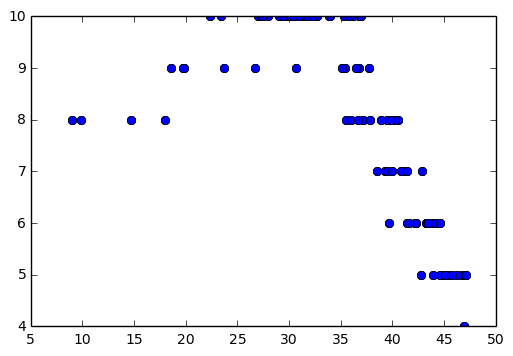

In [31]:
plotNN=plt.plot(dist,NN,'o')

In [30]:
%matplotlib inline
plt.show()

In [32]:
holef=[]
for i,n in enumerate(NN):
    if n==8 and dist[i] < 30: 
        print 'found',i,dist[i]
        holef.append(i)

found 83 14.7133120069
found 84 9.86628899674
found 85 17.9979682757
found 86 8.99886468334
found 97 8.99898061781
found 98 9.86611134669
found 108 17.9978894068
found 110 14.7135327486


In [33]:
oxyz=np.zeros(3)
for h in holef:
    oxyz+=big.CMs[h]
print oxyz/len(holef)-big.centroid()

[  3.95779152e-05   3.96290001e-05  -3.14265336e-05]


In [54]:
frg3=three.fragments[0]

In [35]:
c3=frg3.centroid()
cb=oxyz/len(holef)
shift=np.mat(cb-c3).T

In [37]:
frg3.transform(t=shift)

In [38]:
frg3.xyz()

108 atomic
# xyz dump 
H 55.3425459208 51.1265916795 27.9510438896
H 51.3438873309 53.4793008936 27.2329479055
C 53.919582149 51.1511581191 29.42503021
C 51.6235649076 52.5023121092 29.0130699716
C 54.3164265248 49.9209462231 31.6152227884
C 49.8226559109 52.5665635533 30.8083099222
H 56.0625315742 48.8910454852 31.9308072402
H 48.0746598126 53.5945738092 30.4983946488
H 42.8514568043 46.4136147248 51.3930964081
H 46.8501176618 44.0590158659 52.1111923354
C 46.5704368726 45.0360041911 50.3310703261
C 44.2744201981 46.3871587481 49.9191081412
C 48.369457277 44.9736432478 48.5358305078
C 43.8756879859 47.6173704552 47.7289174526
H 42.1295806688 48.647271382 47.4133331898
H 50.1174550761 43.9456324062 48.8457437025
C 50.1439112418 51.2891079372 33.1799162085
C 52.4663846489 49.9247254863 33.5975454931
C 52.8462177102 48.6775064331 35.8406509698
H 54.5942143754 47.6494952324 36.1505652984
C 48.3241034721 51.3382408165 35.0299577065
H 46.5798856922 52.3681413654 34.7124842845
C 48.048203646

In [39]:
big.append(frg3)

In [40]:
len(big)

6876

In [41]:
#dump the new system in a bigger system
big.xyz('newbig.xyz',units='angstroem')

In [42]:
newbig=ef.System(xyz='newbig.xyz',nat_reference=36,units='A')

Warning, line not parsed: " # xyz dump 
could not convert string to float: xyz "


In [43]:
len(newbig)

6876

In [44]:
len(newbig.fragments)

191

In [45]:
two=ef.System(xyz='testfiles/two.xyz',nat_reference=36,units='A')

Warning, line not parsed: " # V_Sim export to xyz from 'pentacene.ascii'
could not convert string to float: V_Sim "


In [46]:
len(two.fragments)

2

In [47]:
newbig.decompose(two.fragments)

#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection d

In [48]:
big_rigid=ef.System(transformations=newbig.decomposition)

In [49]:
len(big_rigid)

6876

In [50]:
big_rigid.xyz('testfiles/newbig-rigid.xyz',units='angstroem')

In [51]:
newc=ef.XYZfile(filename='testfiles/newcenters2.xyz',units='angstroem')

In [52]:
newc.append(newbig.CMs,basename='Cen')

In [53]:
newc.dump()

In [105]:
PCF4TCNQ=ef.System(xyz='pentacene_f4tcnq_5_reduced.xyz',units='angstroem')

Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, line not parsed: " 
list index out of range "
Warning, l

In [106]:
len(PCF4TCNQ)

37460

In [115]:
PC1=None
F41=None
for f in PCF4TCNQ.fragments:
    if len(f)==36: PC1=f
    if len(f)==20: F41=f
    if PC1 and F41: break
PCF4TCNQ.decompose(reference_fragments=[PC1,F41])

#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected
#Reflection detected


In [130]:
PENF4=ef.System()

In [131]:
import copy
cnt=0
for i,frag in enumerate(PCF4TCNQ.decomposition):
    J=frag['J']
    if True:
        fr=copy.deepcopy(frag['ref'])
        fr.transform(frag['R'],frag['t'])
    else:
        fr=PCF4TCNQ.fragments[i]
        print 'Fragment',i,'of len',len(fr),'has been left as-is, (J:',J,')'
        cnt+=1
    PENF4.append(fr)
print 'untouched',cnt
        
        

untouched 0


In [132]:
len(PENF4)

37460

In [122]:
len(PCF4TCNQ)

37460

In [133]:
PENF4.xyz(filename='pentacene_f4tcnq_5_rigidified-all.xyz')

In [127]:
countf4=0
for f in PCF4TCNQ.fragments:
    if len(f)==36: countf4+=1
print 'no f4',countf4

no f4 1010


In [137]:
icen=big_rigid.central_fragment()

In [138]:
iat=0
for i,f in enumerate(big_rigid.fragments):
    if i==icen: print 'from',iat+1
    iat+=len(f)
    if i==icen:
        print 'to',iat+1
        break

from 6769
to 6805
